# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

* Data
* Variable	Definition
* User_ID	User ID
* Product_ID	Product ID
* Gender	Sex of User
* Age	Age in bins
* Occupation	Occupation (Masked)
* City_Category	Category of the City (A,B,C)
* Stay_In_Current_City_Years	Number of years stay in current city
* Marital_Status	Marital Status
* Product_Category_1	Product Category (Masked)
* Product_Category_2	Product may belongs to other category also (Masked)
* Product_Category_3	Product may belongs to other category also (Masked)
* Purchase	Purchase Amount (Target Variable)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("bf_train.csv")

In [3]:
train.head() #seeing the first five rows

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
train_obj=train.select_dtypes("O") # Taking the object type to convert it into some number

In [6]:
train_obj.head()

Product_ID Gender   Age City_Category Stay_In_Current_City_Years
0  P00069042      F  0-17             A                          2
1  P00248942      F  0-17             A                          2
2  P00087842      F  0-17             A                          2
3  P00085442      F  0-17             A                          2
4  P00285442      M   55+             C                         4+

In [7]:
train_obj.drop(["Product_ID"],axis=1,inplace=True) # Drop the feature Product Id because we donot need this for prediction

c:\python38\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
train_obj.head() # Product Id removed successfully

Gender   Age City_Category Stay_In_Current_City_Years
0      F  0-17             A                          2
1      F  0-17             A                          2
2      F  0-17             A                          2
3      F  0-17             A                          2
4      M   55+             C                         4+

In [9]:
train_obj['Gender']=train_obj.Gender.map({'F':0,'M':1}) # Mapping the Male and Female to 0,1 respectively.

<ipython-input-9-bcbfe3562f0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_obj['Gender']=train_obj.Gender.map({'F':0,'M':1}) # Mapping the Male and Female to 0,1 respectively.


In [10]:
train_obj.head() 

Gender   Age City_Category Stay_In_Current_City_Years
0       0  0-17             A                          2
1       0  0-17             A                          2
2       0  0-17             A                          2
3       0  0-17             A                          2
4       1   55+             C                         4+

In [11]:
train_obj.Age.unique() # Viewing the unique values for Age

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
train_obj['Age']=train_obj.Age.map({'0-17':0, '55+':1, '26-35':2, '46-50':3, '51-55':4, '36-45':5, '18-25':6}) # mapping the Age with numbers

<ipython-input-12-1d5bd0923c21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_obj['Age']=train_obj.Age.map({'0-17':0, '55+':1, '26-35':2, '46-50':3, '51-55':4, '36-45':5, '18-25':6}) # mapping the Age with numbers


In [13]:
train_obj.head()

Gender  Age City_Category Stay_In_Current_City_Years
0       0    0             A                          2
1       0    0             A                          2
2       0    0             A                          2
3       0    0             A                          2
4       1    1             C                         4+

In [14]:
train_obj.City_Category.unique() # seing the unique values for City_Category

array(['A', 'C', 'B'], dtype=object)

In [15]:
City=pd.get_dummies(data=train_obj['City_Category'],drop_first=True,prefix='city') # Doing One-Hot Encoding for City_Category with drop_First=True

In [16]:
train_obj=pd.concat([train_obj.drop('City_Category',axis=1),City],axis=1) #Concatenate city with train_opj

In [17]:
train_obj.head()

Gender  Age Stay_In_Current_City_Years  city_B  city_C
0       0    0                          2       0       0
1       0    0                          2       0       0
2       0    0                          2       0       0
3       0    0                          2       0       0
4       1    1                         4+       0       1

In [18]:
train_obj.Stay_In_Current_City_Years.unique() # Unique values for Stay_In _Current_City Feature

array(['2', '4+', '3', '1', '0'], dtype=object)

In [19]:
train_obj.Stay_In_Current_City_Years.value_counts() # Value counts

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [20]:
train_obj['Stay_In_Current_City_Years']=train_obj.Stay_In_Current_City_Years.str.replace('+','') # replacing + with ''

In [21]:
train_obj.dtypes # The datatype for Stay_In_Current_City_Years feature is obj so make it to int

Gender                         int64
Age                            int64
Stay_In_Current_City_Years    object
city_B                         uint8
city_C                         uint8
dtype: object

In [22]:
train_obj.Stay_In_Current_City_Years=train_obj.Stay_In_Current_City_Years.astype('int') # Parse string to int

In [23]:
train_obj.head()

Gender  Age  Stay_In_Current_City_Years  city_B  city_C
0       0    0                           2       0       0
1       0    0                           2       0       0
2       0    0                           2       0       0
3       0    0                           2       0       0
4       1    1                           4       0       1

In [24]:
train_obj.dtypes # Now all the objects convert into integer

Gender                        int64
Age                           int64
Stay_In_Current_City_Years    int32
city_B                        uint8
city_C                        uint8
dtype: object

In [25]:
train2=pd.concat([train.drop(columns=train.select_dtypes('O'),axis=1),train_obj],axis=1) #Concatenate train obj and train column

In [26]:
train2.head()

User_ID  Occupation  Marital_Status  Product_Category_1  \
0  1000001          10               0                   3   
1  1000001          10               0                   1   
2  1000001          10               0                  12   
3  1000001          10               0                  12   
4  1000002          16               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Gender  Age  \
0                 NaN                 NaN      8370       0    0   
1                 6.0                14.0     15200       0    0   
2                 NaN                 NaN      1422       0    0   
3                14.0                 NaN      1057       0    0   
4                 NaN                 NaN      7969       1    1   

   Stay_In_Current_City_Years  city_B  city_C  
0                           2       0       0  
1                           2       0       0  
2                           2       0       0  
3                           2       0       0  
4                           4       0       1

In [27]:
train2.describe() # Describing the basic statistics of the data.

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase         Gender  \
count       376430.000000       166821.000000  550068.000000  550068.000000   
mean             9.842329           12.668243    9263.968713       0.753105   
std              5.086590            4.125338    5023.065394       0.431205   
min              2.000000            3.000000      12.000000       0.000000   
25%              5.000000            9.000000    5823.000000       1.000000   
50%              9.000000           14.000000    8047.000000       1.000000   
75%             15.000000           16.000000   12054.000000       1.000000   
max             18.000000           18.000000   23961.000000       1.000000   

                 Age  Stay_In_Current_City_Years         city_B         city_C  
count  550068.000000               550068.000000  550068.000000  550068.000000  
mean        3.453773                    1.858418       0.420263       0.311189  
std         1.759929                    1.289443       0.493601       0.462980  
min         0.000000                    0.000000       0.000000       0.000000  
25%         2.000000                    1.000000       0.000000       0.000000  
50%         3.000000                    2.000000       0.000000       0.000000  
75%         5.000000                    3.000000       1.000000       1.000000  
max         6.000000                    4.000000       1.000000       1.000000

In [28]:
train2.isnull().sum() # Seeing how much null values present in the dataframe

User_ID                            0
Occupation                         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
Gender                             0
Age                                0
Stay_In_Current_City_Years         0
city_B                             0
city_C                             0
dtype: int64

In [29]:
(train2.isnull().sum()/train2.shape[0])*100 # Seeing the nan values w.r.t the percentages

User_ID                        0.000000
Occupation                     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
Gender                         0.000000
Age                            0.000000
Stay_In_Current_City_Years     0.000000
city_B                         0.000000
city_C                         0.000000
dtype: float64

In [30]:
train2.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

c:\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


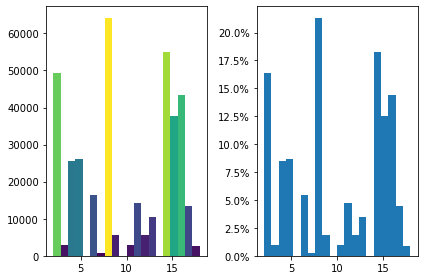

In [31]:
# Observing the distribution for Product_Category_2 
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(1, 2, tight_layout=True)
n_bins = 20
# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(train2['Product_Category_2'], bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(train2['Product_Category_2'], bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

### Puting values into Product_Category_2 by mean, mode, median and random and then find the distributions

In [32]:

def impute_nan_as_random_sample(df,variable):
    df["random_"+variable]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),'random_'+variable]=random_sample

In [33]:
train2['mean_Product_Category_2']=train2.Product_Category_2.fillna(value=int(train2.Product_Category_2.mean()),axis=0)
train2['mode_Product_Category_2']=train2.Product_Category_2.fillna(value=train2.Product_Category_2.mode()[0],axis=0)
train2['median_Product_Category_2']=train2.Product_Category_2.fillna(value=train2.Product_Category_2.median(),axis=0)
impute_nan_as_random_sample(train2,'Product_Category_2')

In [34]:
train2.head()

User_ID  Occupation  Marital_Status  Product_Category_1  \
0  1000001          10               0                   3   
1  1000001          10               0                   1   
2  1000001          10               0                  12   
3  1000001          10               0                  12   
4  1000002          16               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Gender  Age  \
0                 NaN                 NaN      8370       0    0   
1                 6.0                14.0     15200       0    0   
2                 NaN                 NaN      1422       0    0   
3                14.0                 NaN      1057       0    0   
4                 NaN                 NaN      7969       1    1   

   Stay_In_Current_City_Years  city_B  city_C  mean_Product_Category_2  \
0                           2       0       0                      9.0   
1                           2       0       0                      6.0   
2                           2       0       0                      9.0   
3                           2       0       0                     14.0   
4                           4       0       1                      9.0   

   mode_Product_Category_2  median_Product_Category_2  \
0                      8.0                        9.0   
1                      6.0                        6.0   
2                      8.0                        9.0   
3                     14.0                       14.0   
4                      8.0                        9.0   

   random_Product_Category_2  
0                       14.0  
1                        6.0  
2                       14.0  
3                       14.0  
4                       15.0

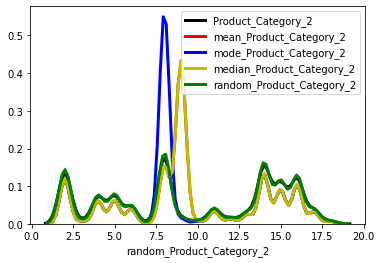

In [45]:
# Now ploting the distrubutuon for Product_Category_2 with mean,mode,median,random
sns.distplot(train2["Product_Category_2"],kde_kws={"color": "k", "lw": 3, "label": "Product_Category_2"},hist=False)
sns.distplot(train2["mean_Product_Category_2"],kde_kws={"color": "r", "lw": 3, "label": "mean_Product_Category_2"},hist=False)
sns.distplot(train2["mode_Product_Category_2"],kde_kws={"color": "b", "lw": 3, "label": "mode_Product_Category_2"},hist=False)
sns.distplot(train2["median_Product_Category_2"],kde_kws={"color": "y", "lw": 3, "label": "median_Product_Category_2"},hist=False)
sns.distplot(train2["random_Product_Category_2"],kde_kws={"color": "g", "lw": 3, "label": "random_Product_Category_2"},hist=False)

In [52]:
# By seeing at the graph we use mode because we cann't add products by our side
train2.drop(columns=["Product_Category_2","mean_Product_Category_2","median_Product_Category_2","random_Product_Category_2"],axis=1,inplace=True)

In [53]:
train2.rename(columns={"mode_Product_Category_2":"Product_Category_2"},inplace=True) #Rename the mode_Product_Category_2 to Product_Category_2 

In [54]:
train2.head()

User_ID  Occupation  Marital_Status  Product_Category_1  \
0  1000001          10               0                   3   
1  1000001          10               0                   1   
2  1000001          10               0                  12   
3  1000001          10               0                  12   
4  1000002          16               0                   8   

   Product_Category_3  Purchase  Gender  Age  Stay_In_Current_City_Years  \
0                 NaN      8370       0    0                           2   
1                14.0     15200       0    0                           2   
2                 NaN      1422       0    0                           2   
3                 NaN      1057       0    0                           2   
4                 NaN      7969       1    1                           4   

   city_B  city_C  Product_Category_2  
0       0       0                 8.0  
1       0       0                 6.0  
2       0       0                 8.0  
3       0       0                14.0  
4       0       1                 8.0

In [58]:
# adding mode values to Product_Category_3 
train2.Product_Category_3.fillna(value=train2.Product_Category_3.mode()[0],axis=0,inplace=True)

In [59]:
train2.head()

User_ID  Occupation  Marital_Status  Product_Category_1  \
0  1000001          10               0                   3   
1  1000001          10               0                   1   
2  1000001          10               0                  12   
3  1000001          10               0                  12   
4  1000002          16               0                   8   

   Product_Category_3  Purchase  Gender  Age  Stay_In_Current_City_Years  \
0                16.0      8370       0    0                           2   
1                14.0     15200       0    0                           2   
2                16.0      1422       0    0                           2   
3                16.0      1057       0    0                           2   
4                16.0      7969       1    1                           4   

   city_B  city_C  Product_Category_2  
0       0       0                 8.0  
1       0       0                 6.0  
2       0       0                 8.0  
3       0       0                14.0  
4       0       1                 8.0

### Same process for the test data

In [61]:
test=pd.read_csv("bf_test.csv")

In [62]:
test.head()

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000004  P00128942      M  46-50           7             B   
1  1000009  P00113442      M  26-35          17             C   
2  1000010  P00288442      F  36-45           1             B   
3  1000010  P00145342      F  36-45           1             B   
4  1000011  P00053842      F  26-35           1             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               1                   1   
1                          0               0                   3   
2                         4+               1                   5   
3                         4+               1                   4   
4                          1               0                   4   

   Product_Category_2  Product_Category_3  
0                11.0                 NaN  
1                 5.0                 NaN  
2                14.0                 NaN  
3                 9.0                 NaN  
4                 5.0                12.0

In [63]:
test.shape

(233599, 11)

In [64]:
test.drop(columns=["User_ID","Product_ID"],axis=0,inplace=True) #Dropping unwanted columns

In [66]:
test["Gender"]=test.Gender.map({"M":1,"F":0}) # Mopping the Gender with 1,0 for Male or Female respectively

In [68]:
test["Age"].unique() # Unique values from Age

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [69]:
test["Age"]=test.Age.map({'46-50':0, '26-35':1, '36-45':2, '18-25':3, '51-55':4, '55+':5, '0-17':6}) # Converting into catagories

In [70]:
test_city=pd.get_dummies(test["City_Category"],drop_first=True,prefix="City") # One hot encoding for City_Category where drop_first is true

In [74]:
test2=pd.concat([test.drop(["City_Category"],axis=1),test_city],axis=1) # Concatenate test and test_city

In [75]:
test2.head()

Gender  Age  Occupation Stay_In_Current_City_Years  Marital_Status  \
0       1    0           7                          2               1   
1       1    1          17                          0               0   
2       0    2           1                         4+               1   
3       0    2           1                         4+               1   
4       0    1           1                          1               0   

   Product_Category_1  Product_Category_2  Product_Category_3  City_B  City_C  
0                   1                11.0                 NaN       1       0  
1                   3                 5.0                 NaN       0       1  
2                   5                14.0                 NaN       1       0  
3                   4                 9.0                 NaN       1       0  
4                   4                 5.0                12.0       0       1

In [76]:
test2.Stay_In_Current_City_Years=test2.Stay_In_Current_City_Years.str.replace("+","") # Replace + with space

In [79]:
test2.Stay_In_Current_City_Years=test2.Stay_In_Current_City_Years.astype("int") # Parse str into int

In [82]:
test2.Product_Category_2=test2.Product_Category_2.fillna(value=test2.Product_Category_2.mode()[0],axis=0) # Filling nan values with mode
test2.Product_Category_3=test2.Product_Category_3.fillna(value=test2.Product_Category_3.mode()[0],axis=0) # Filling nan values with mode

In [83]:
test2.head()

Gender  Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0       1    0           7                           2               1   
1       1    1          17                           0               0   
2       0    2           1                           4               1   
3       0    2           1                           4               1   
4       0    1           1                           1               0   

   Product_Category_1  Product_Category_2  Product_Category_3  City_B  City_C  
0                   1                11.0                16.0       1       0  
1                   3                 5.0                16.0       0       1  
2                   5                14.0                16.0       1       0  
3                   4                 9.0                16.0       1       0  
4                   4                 5.0                12.0       0       1

In [84]:
train2.drop(columns=["User_ID"],axis=1,inplace=True) # Drop unwanted User_ID from train2

In [88]:
train2.to_csv("final_bf_train.csv",index=False) # Creating the final csv file after the preprocessing
test2.to_csv("final_bf_test.csv",index=False) # Creating the final csv file after the preprocessing

In [89]:
df=pd.read_csv("final_bf_train.csv") # read final_bf_train.csv for intense exploratory data analysis

In [90]:
df.head()

Occupation  Marital_Status  Product_Category_1  Product_Category_3  \
0          10               0                   3                16.0   
1          10               0                   1                14.0   
2          10               0                  12                16.0   
3          10               0                  12                16.0   
4          16               0                   8                16.0   

   Purchase  Gender  Age  Stay_In_Current_City_Years  city_B  city_C  \
0      8370       0    0                           2       0       0   
1     15200       0    0                           2       0       0   
2      1422       0    0                           2       0       0   
3      1057       0    0                           2       0       0   
4      7969       1    1                           4       0       1   

   Product_Category_2  
0                 8.0  
1                 6.0  
2                 8.0  
3                14.0  
4                 8.0

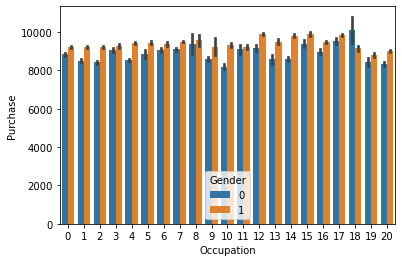

In [94]:
sns.barplot(x="Occupation",y="Purchase",hue="Gender",data=df) # Analysis b/w Occupation and Purchase w.r.t Gender

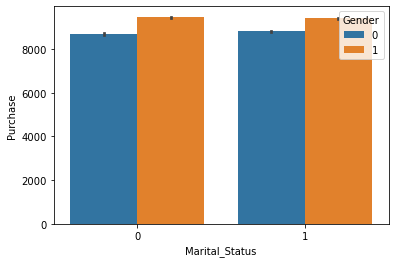

In [95]:
sns.barplot(x="Marital_Status",y="Purchase",hue="Gender",data=df) # Analysis b/w Marital_Status and Purchase w.r.t Gender

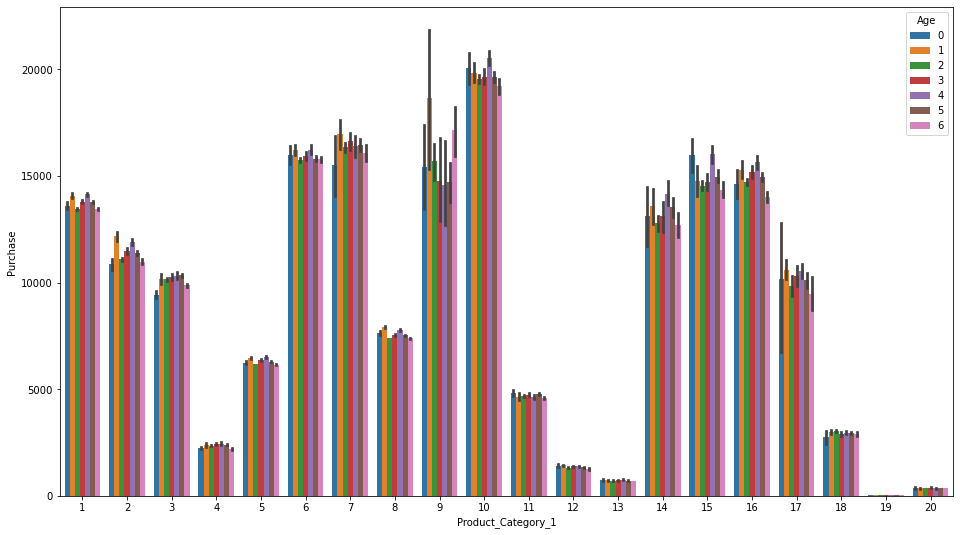

In [97]:
plt.figure(figsize=(16,9)) # Increasing figsize for better visualization
sns.barplot(x="Product_Category_1",y="Purchase",hue="Age",data=df) # Analysis b/w Product_Category_1 and Purchase w.r.t Age

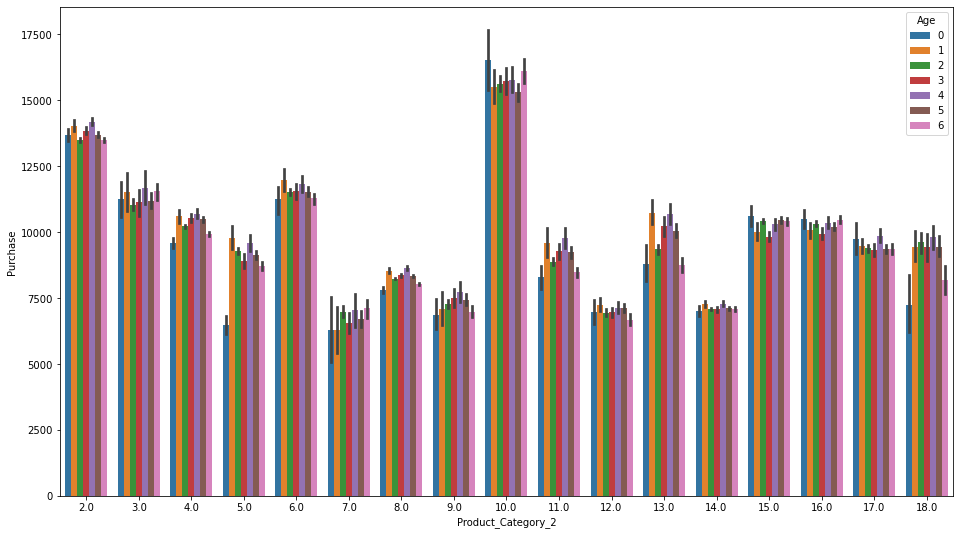

In [100]:
plt.figure(figsize=(16,9)) # Increasing figsize for better visualization
sns.barplot(x="Product_Category_2",y="Purchase",hue="Age",data=df) # Analysis b/w Product_Category_2 and Purchase w.r.t Age

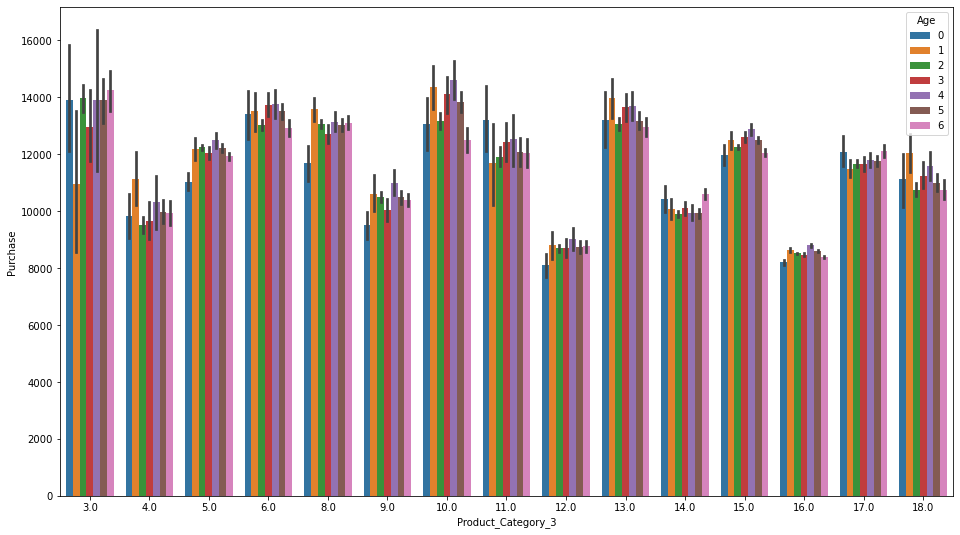

In [101]:
plt.figure(figsize=(16,9)) # Increasing figsize for better visualization
sns.barplot(x="Product_Category_3",y="Purchase",hue="Age",data=df) # Analysis b/w Product_Category_3 and Purchase w.r.t Age

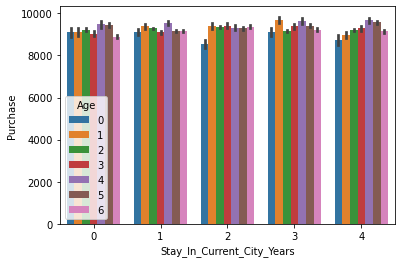

In [102]:
sns.barplot(x="Stay_In_Current_City_Years",y="Purchase",hue="Age",data=df) # Analysis b/w Stay_In_Current_City_Years and Purchase w.r.t Age

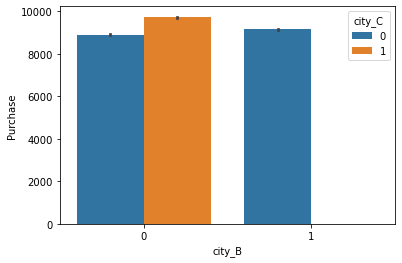

In [104]:
sns.barplot(x="city_B",y="Purchase",hue="city_C",data=df) # Analysis b/w city_B and Purchase w.r.t city_C

In [105]:
import pandas_profiling # It is used for a deeper understanding than the normal Dataframe.describe() method

In [106]:
df.profile_report() # View profile report 

In [109]:
# The data is now ready to feed into ML model but we don't do it now because there we just have to do the Exploratory Data Analysis